100%|===================| 109568/109570 [09:09<00:00]        

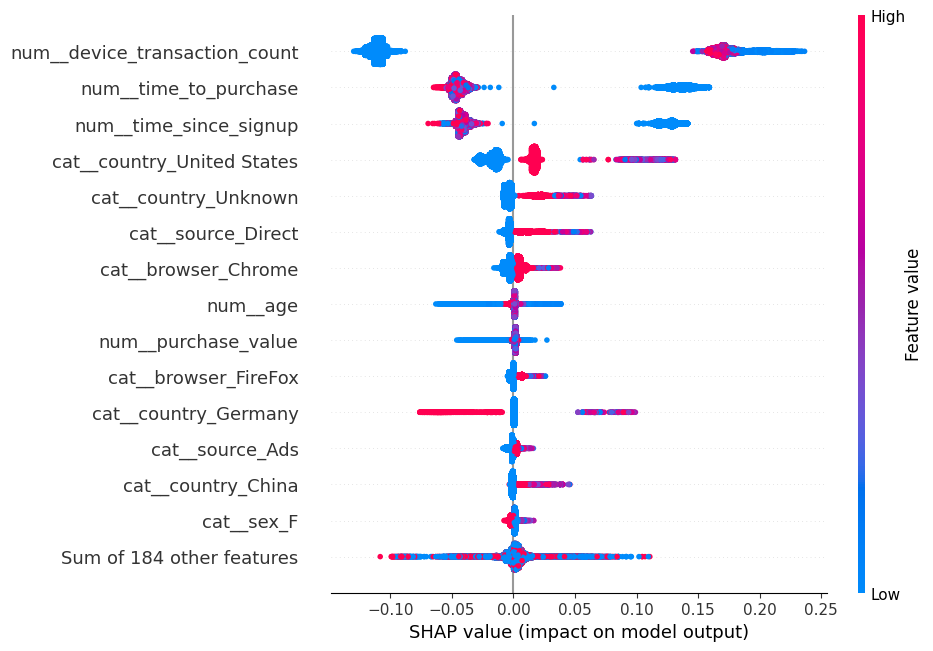

In [ ]:
import shap
import joblib
import numpy as np
import pandas as pd

# Load Model & Artifacts
rf_fraud_model = joblib.load('../models/rf_fraud_model.pkl')
Xf_test = pd.read_parquet('../data/processed/Xf_test.parquet')
feature_names_fraud = np.load('../models/feature_names_fraud.npy', allow_pickle=True)

# DataFrame with Correct Columns
Xf_test_df = pd.DataFrame(Xf_test, columns=feature_names_fraud)

# SHAP Explainer with Additivity Check Disabled
explainer_fraud = shap.Explainer(rf_fraud_model, Xf_test_df)
shap_values_fraud = explainer_fraud(Xf_test_df, check_additivity=False)

# Beeswarm Plot
shap.plots.beeswarm(shap_values_fraud[:, :, 1], max_display=15)


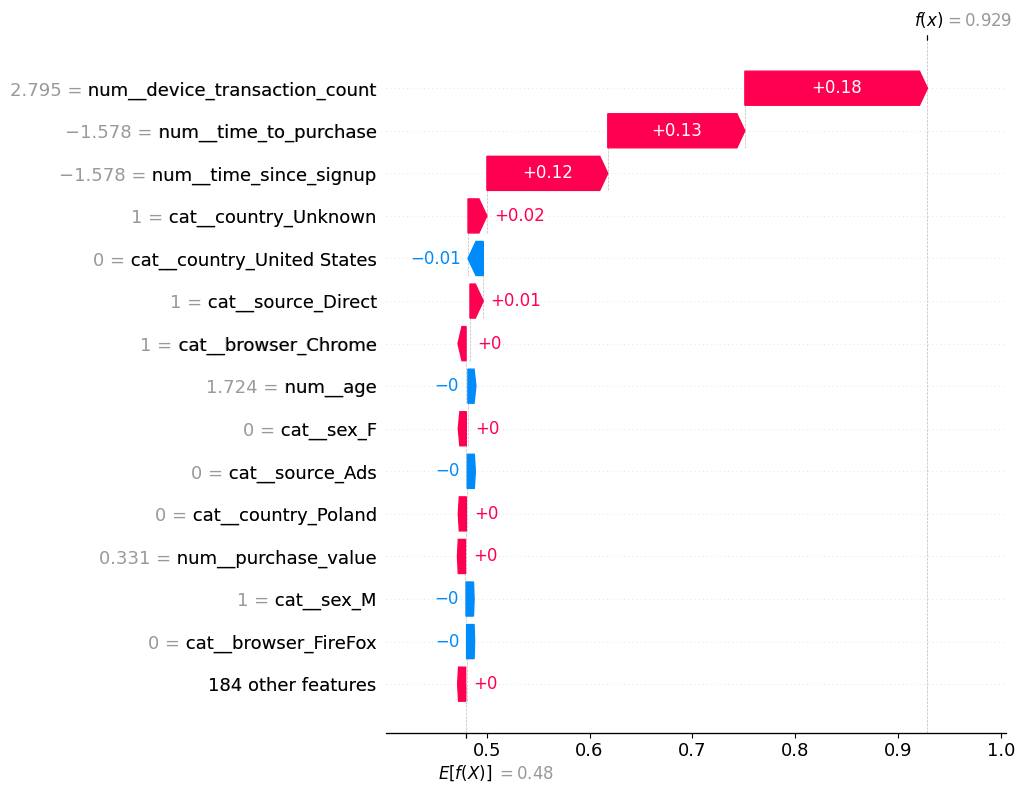

In [3]:
# Local Waterfall for First Test Instance (Class 1)
shap.plots.waterfall(shap_values_fraud[0, :, 1], max_display=15)


Here’s what it shows for fraud detection model:

* **Top Feature: `num__device_transaction_count`**

  * Higher values strongly increase fraud prediction.
  * Clear separation between impactful (pink) and less impactful (blue) values.
* **Other impactful features:**

  * `num__time_to_purchase` — higher value → increases fraud risk.
  * `num__time_since_signup` — long signup time slightly reduces fraud risk.
  * `cat__country_United States` — associated with lower fraud risk (left side).
  * `cat__country_Unknown` and `cat__source_Direct` — associated with higher fraud.

###  Interpretation Summary:

* **Numerical counts and timing-based features** are dominant.
* Some **browser and country categories** have visible impact.
* Model seems to leverage transaction patterns and user metadata — this is expected for fraud detection.




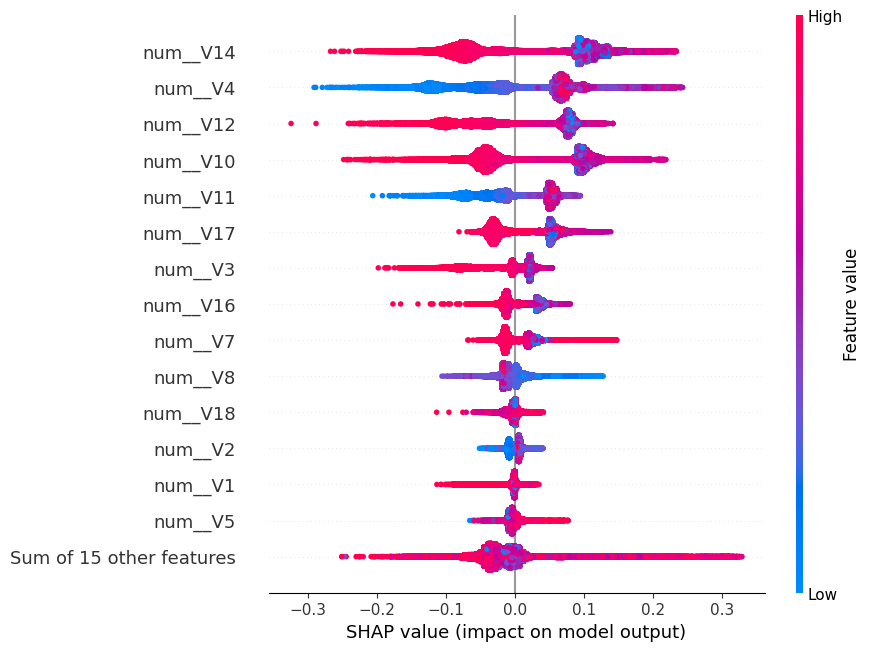

In [4]:
import numpy as np
import shap
import pandas as pd
import joblib

# Load Model & Artifacts
rf_creditcard_model = joblib.load('../models/rf_creditcard_model.pkl')
Xcc_test = pd.read_parquet('../data/processed/Xc_test.parquet')
feature_names_cc = np.load('../models/feature_names_creditcard.npy', allow_pickle=True)

# Prepare Test Data with Correct Feature Names
Xcc_test_df = pd.DataFrame(Xcc_test, columns=feature_names_cc)

# Initialize SHAP Explainer
explainer_cc = shap.TreeExplainer(rf_creditcard_model)
shap_values_cc = explainer_cc(Xcc_test_df)

# Global SHAP Beeswarm Plot for Class 1 (Fraudulent Transactions)
shap.plots.beeswarm(shap_values_cc[:, :, 1], max_display=15)


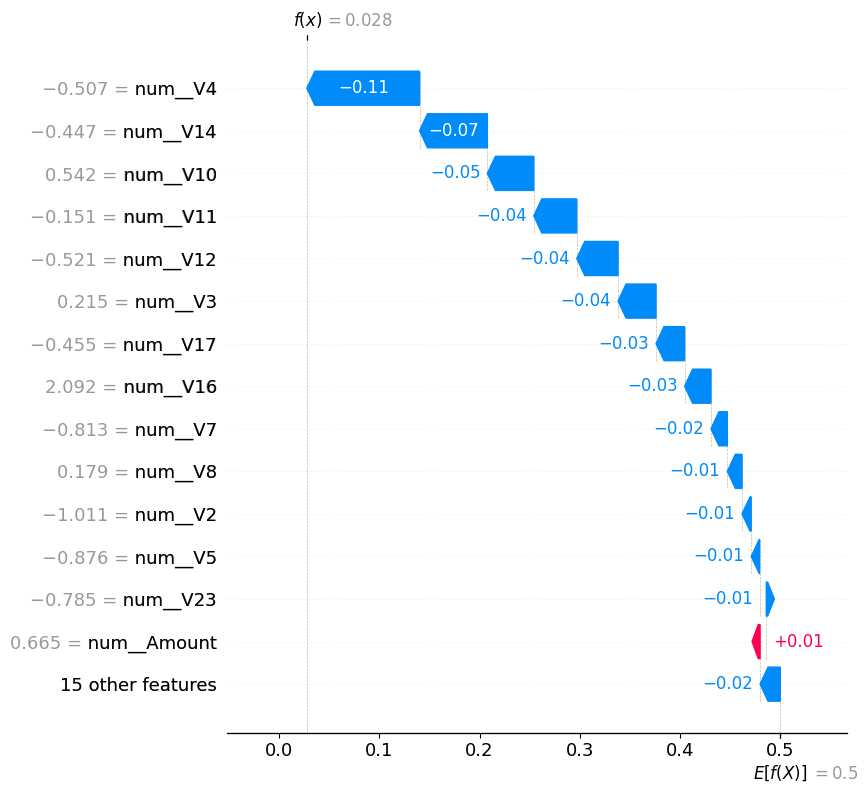

In [5]:
# Local Waterfall for First Test Instance (Class 1)
shap.plots.waterfall(shap_values_cc[0, :, 1], max_display=15)
